<a href="https://colab.research.google.com/github/HANABLI/OpenCv-Python/blob/master/18_01_Foreground_Segmentation_for_Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Application: Foreground Segmentation for Image Enhancement</h1>

In this notebook, we are going to demonstrate how to use MediaPipe Selfie Segmentation which allows you to segment the foreground from the background in selfie-style photos. Segmenting the foreground in such images allows you to then easily add special effects to either the foreground or the background, such as blurring or any other filtering methods that you may wish to apply. Segmenting the foreground also allows you to perform background replacement.

<br>
<center>
<img src='https://opencv.org/wp-content/uploads/2021/10/c0-m18-01-feature-image.png' alt="Foreground-segmentation-feature-image">
</center>
<br>

Documentation [**MediaPipe Selfie Segmentation**](https://ai.google.dev/edge/mediapipe/solutions/vision/image_segmenter)

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/rwdnr9ntbv0r77a/AAAZaHZtPQKZILKWKJbYRejTa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    !pip install --upgrade opencv-contrib-python
    !pip install mediapipe
else:
    pass

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 14
%matplotlib inline

# 1. Display Input Images

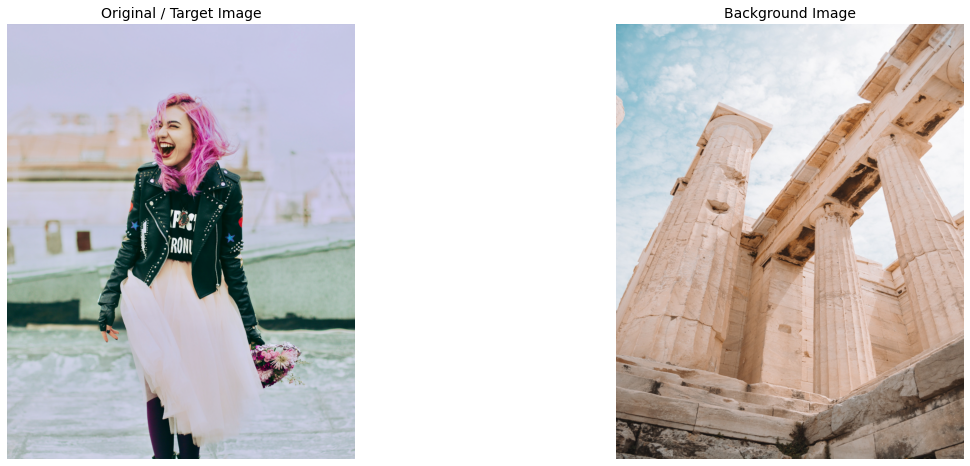

In [ ]:
# Read the target (foreground) image.
img = cv2.imread('girl.png')

# Read a background image.
bg_img = cv2.imread('parthenon.jpg')

# Resize the background image to be the same size as the target image.
bg_img = cv2.resize(bg_img, (img.shape[1], img.shape[0]))

plt.figure(figsize = (20,8))
plt.subplot(121); plt.imshow(img[:,:,::-1]);    plt.axis('off'); plt.title('Original / Target Image');
plt.subplot(122); plt.imshow(bg_img[:,:,::-1]); plt.axis('off'); plt.title('Background Image');

# 2. Initialize MediaPipe Selfi Segmentation

In [ ]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segment = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)

# 3. Segment the Foreground

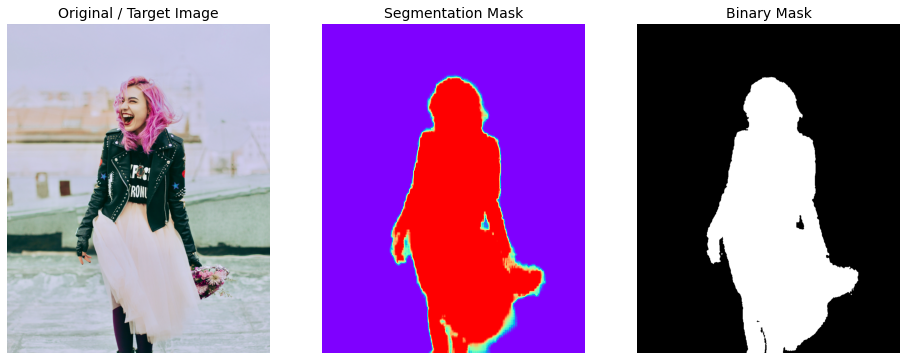

In [ ]:
# Convert to RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Segment the original image.
results = segment.process(img)

# Convert to BGR.
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Retrieve segmentation mask from results.
img_seg_mask = results.segmentation_mask

# Apply a threhsold to generate a binary mask.
threshold = 0.5
binary_mask = img_seg_mask > threshold

plt.figure(figsize = (16,10))
plt.subplot(131); plt.axis('off'); plt.imshow(img[:,:,::-1]);                 plt.title('Original / Target Image')
plt.subplot(132); plt.axis('off'); plt.imshow(img_seg_mask, cmap='rainbow');  plt.title('Segmentation Mask')
plt.subplot(133); plt.axis('off'); plt.imshow(binary_mask);                   plt.title('Binary Mask');

# 4. Background Replacement

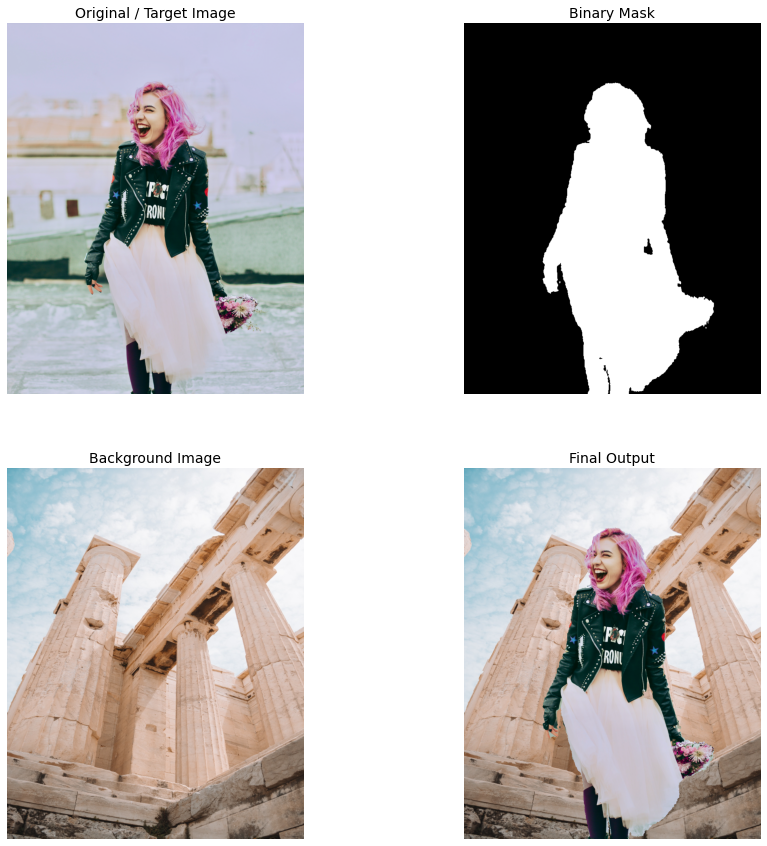

In [ ]:
# Convert the mask to a 3 channel image.
mask3d = np.dstack((binary_mask, binary_mask, binary_mask))

# Apply the mask to the original image and a new backgroud image.
img_out = np.where(mask3d, img, bg_img)

plt.figure(figsize = (15, 15))
plt.subplot(221); plt.axis('off'); plt.imshow(img[:,:,::-1]);     plt.title('Original / Target Image')
plt.subplot(222); plt.axis('off'); plt.imshow(binary_mask);       plt.title('Binary Mask');
plt.subplot(223); plt.axis('off'); plt.imshow(bg_img[:,:,::-1]);  plt.title('Background Image');
plt.subplot(224); plt.axis('off'); plt.imshow(img_out[:,:,::-1]); plt.title('Final Output');

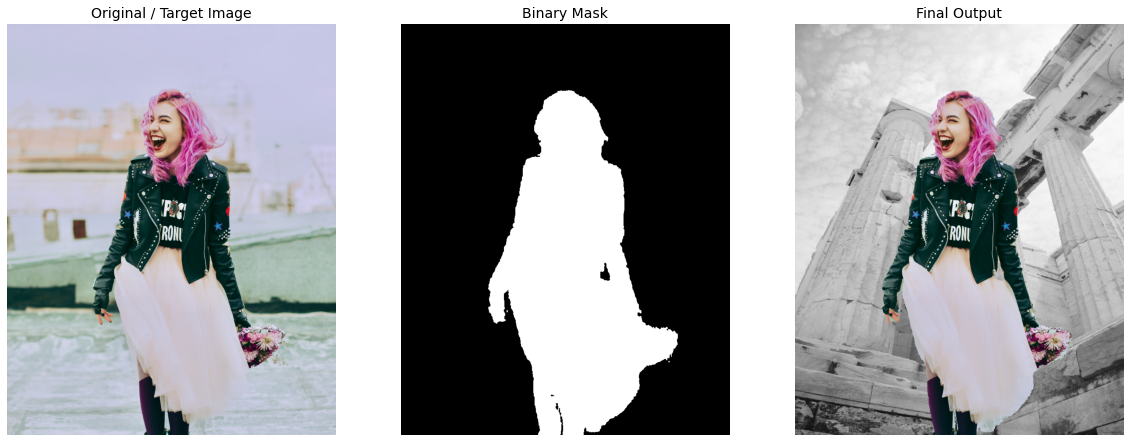

In [ ]:
# Create a 3-channel grayscale background image.
bg_gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
bg_img_gray = cv2.cvtColor(bg_gray, cv2.COLOR_GRAY2BGR)

# Apply the mask to the original image and grayscale version of the background image.
img_out = np.where(mask3d, img, bg_img_gray)

plt.figure(figsize = (20,20))
plt.subplot(131); plt.axis('off'); plt.imshow(img[:,:,::-1]);     plt.title('Original / Target Image')
plt.subplot(132); plt.axis('off'); plt.imshow(binary_mask);       plt.title('Binary Mask')
plt.subplot(133); plt.axis('off'); plt.imshow(img_out[:,:,::-1]); plt.title('Final Output');

# 4.1 Segmentation Threshold Experiment

Let's see how the threshold value for foreground segmentation will affect the results.

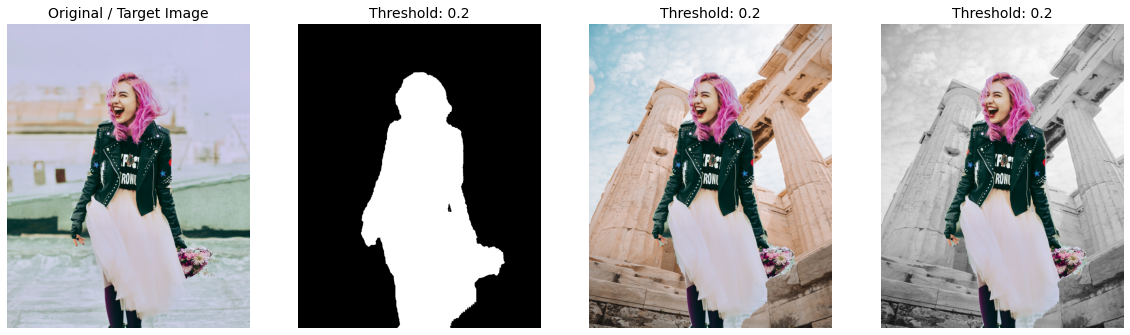

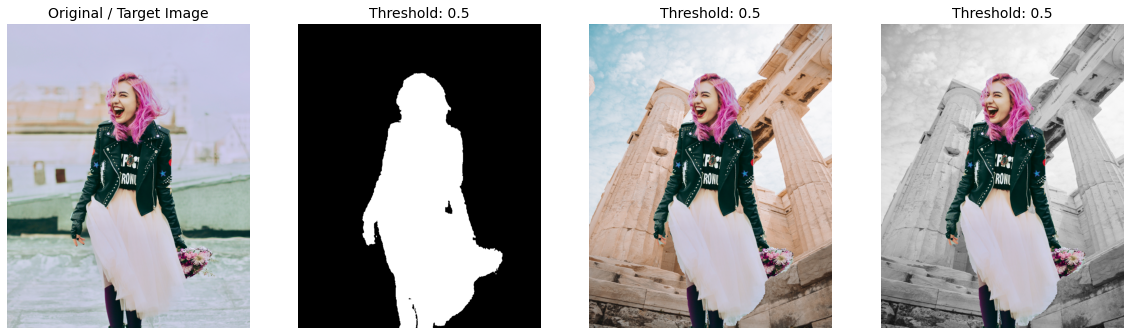

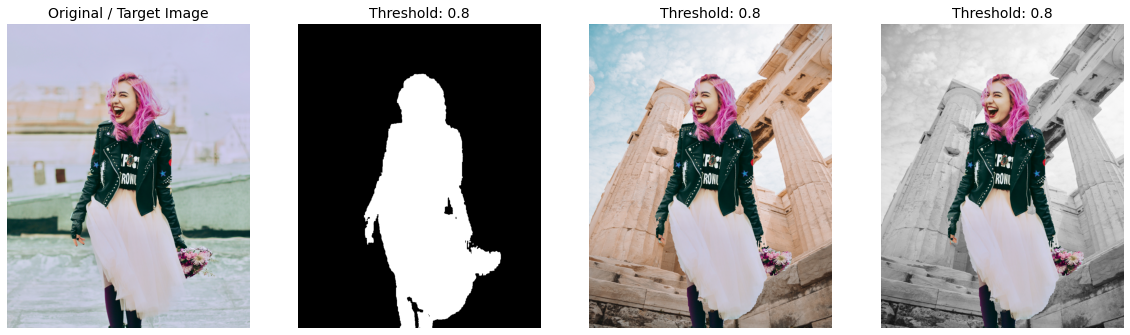

In [ ]:
# Create list of thresholds.
threshold = [0.2, 0.5, 0.8]

title       = []
img_out     = []
img_out_bw  = []
mask3d      = []
binary_mask = []

# Create plot titles.
for idx in range(len(threshold)):
    temp = 'Threshold: ' + str(threshold[idx])
    title.append(temp)

# Convert to RGB for MediaPipe.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Segment image foreground.
results = segment.process(img)

# Convert back to BGR.
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Create a 3-channel grayscale background image.
bg_gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
bg_img_gray = cv2.cvtColor(bg_gray, cv2.COLOR_GRAY2BGR)

# Process test cases.
for idx in range(len(threshold)):
    binary_mask.append(results.segmentation_mask > threshold[idx])
    mask3d.append(np.dstack((binary_mask[idx], binary_mask[idx], binary_mask[idx])))
    img_out.append(np.where(mask3d[idx], img, bg_img))
    img_out_bw.append(np.where(mask3d[idx], img, bg_img_gray))

# Plot test cases.
for idx in range(len(threshold)):
    plt.figure(figsize = (20,8))
    plt.subplot(141); plt.axis('off'); plt.imshow(img[:,:,::-1]);             plt.title('Original / Target Image')
    plt.subplot(142); plt.axis('off'); plt.imshow(binary_mask[idx]);          plt.title(title[idx])
    plt.subplot(143); plt.axis('off'); plt.imshow(img_out[idx][:,:,::-1]);    plt.title(title[idx])
    plt.subplot(144); plt.axis('off'); plt.imshow(img_out_bw[idx][:,:,::-1]); plt.title(title[idx]);

    file_out    = 'img_out_thresh_' + str(threshold[idx]) + '.png'
    file_out_bw = 'img_out_bw_thresh_' + str(threshold[idx]) + '.png'
    cv2.imwrite(file_out,    img_out[idx])
    cv2.imwrite(file_out_bw, img_out_bw[idx])

# 4.2 Threshold Experiment Results

The images below provide a better view of the final results. Notice that a higher threshold only considers foreground regions with higher confidence. However, a higher threshold also often results in clipping portions of the actual foreground subject matter. The optimal threshold setting will depend greatly on the image content and your particular application, but as you can see the results can be quite stunning. This particular foreground subject is challenging due to the intricate boundary of the hair, fingers of the right and, and the boquet flowers.

<br>
<center>
<img src='https://opencv.org/wp-content/uploads/2021/10/c0-m18-01-Theshold-Experiment.png' alt="Theshold-Experiment">
</center>
<br>
<center>
<img src='https://opencv.org/wp-content/uploads/2021/10/c0-m18-01-Theshold-Experiment-Zoom.png' alt="Theshold-Experiment-Zoom">
</center>
<br>

# 5. Define Segmentation Filtering Convenience Functions

## 5.1 image_seg_enhance()

This function allows you to provide three effects:

(1) Convert the original background to grayscale.<br/>
(2) Replace the background in the original image with the background image.<br/>
(3) Replace the background in the original image with a grayscale version of the background image.<br/>

In [ ]:
def image_seg_enhance(img, bg_img=None, threshold=0.5, mode='gray'):

    # Convert the image to RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Segment the image.
    results = segment.process(img)

    # Apply the threshold to create a binary map.
    binary_mask = results.segmentation_mask > threshold

    # Convert the mask to a 3-channel image.
    mask = np.dstack((binary_mask, binary_mask, binary_mask))

    # Convert the image back to BGR.
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if mode == 'gray':
        # Convert the original background to grayscale.
        bg_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        bg_img_gray = cv2.cvtColor(bg_gray, cv2.COLOR_GRAY2BGR)
        output_image = np.where(mask, img, bg_img_gray)
    elif mode == 'replace' :
        # Replace the background in the original image with the background image.
        output_image = np.where(mask, img, bg_img)
    elif mode == 'replace_gray':
         # Replace the background in the original image with a grayscale version of the background image.
        bg_gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
        bg_img_gray = cv2.cvtColor(bg_gray, cv2.COLOR_GRAY2BGR)
        output_image = np.where(mask, img, bg_img_gray)
    else:
        output_image = None
        print('Invalid mode provided.')

    return output_image

## 5.2 image_seg_enhance_blur()
This function allows you to provide four effects:

(1) Blur the background in the original image.<br/>
(2) Convert the original background to garyscale and blur.<br/>
(3) Replace the background in the original image with a blurred version of the background image.<br/>
(4) Replace the background in the original image with a blurred/grayscale version of the background image.<br/>

### <font color="green">OpenCV Documentation</font>


[**`gaussianBlur()`**](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

In [ ]:
def image_seg_enhance_blur(img, bg_img=None, ksize=25, threshold=0.3, mode='blur'):

    # Convert the image to RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Segment the image.
    results = segment.process(img)

    # Apply the threshold to create a binary map.
    binary_mask = results.segmentation_mask > threshold

    # Convert the mask to a 3-channel image.
    mask = np.dstack((binary_mask, binary_mask, binary_mask))

    # Convert the image back to BGR.
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if mode == 'blur':
        # Blur the background in the original image.
        blurred_image = cv2.GaussianBlur(img, (ksize, ksize), 0)
        output_image = np.where(mask, img, blurred_image)
    elif mode == 'gray':
        # Convert the original background to garyscale and blur.
        blurred_image = cv2.GaussianBlur(img, (ksize, ksize), 0)
        desat_blurred = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
        desat_blurred = cv2.cvtColor(desat_blurred, cv2.COLOR_GRAY2BGR)
        output_image = np.where(mask, img, desat_blurred)
    elif mode == 'replace':
        # Replace the background in the original image with a blurred version of the background image.
        blurred_image = cv2.GaussianBlur(bg_img, (ksize, ksize), 0)
        output_image = np.where(mask, img, blurred_image)
    elif mode == 'replace_gray':
        # Replace the background in the original image with a blurred/grayscale version of the background image.
        blurred_image = cv2.GaussianBlur(bg_img, (ksize, ksize), 0)
        desat_blurred = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
        desat_blurred = cv2.cvtColor(desat_blurred, cv2.COLOR_GRAY2BGR)
        output_image = np.where(mask, img, desat_blurred)
    else:
        output_image = None
        print('Invalid mode provided.')

    return output_image

# 6. Application Options

In [ ]:
# Read the target (foreground) image.
img = cv2.imread('girl.png')

# Read a background image.
bg_img = cv2.imread('parthenon.jpg')

# Resize the background image to be the same size as the target image.
bg_img = cv2.resize(bg_img, (img.shape[1], img.shape[0]))

thresh = 0.6

# Using: image_seg_enhance()
bg_gray     = image_seg_enhance(img, threshold = thresh, mode = 'gray')
bg_rep      = image_seg_enhance(img, bg_img, threshold = thresh, mode = 'replace')
bg_rep_gray = image_seg_enhance(img, bg_img, threshold = thresh, mode = 'replace_gray')

# Using: image_seg_enhance_blur()
bg_blur          = image_seg_enhance_blur(img, ksize = 71, threshold = thresh, mode = 'blur')
bg_gray_blur     = image_seg_enhance_blur(img, ksize = 71, threshold = thresh, mode = 'gray')
bg_rep_blur      = image_seg_enhance_blur(img, bg_img, ksize = 21, threshold = thresh, mode = 'replace')
bg_rep_gray_blur = image_seg_enhance_blur(img, bg_img, ksize = 21, threshold = thresh, mode = 'replace_gray')

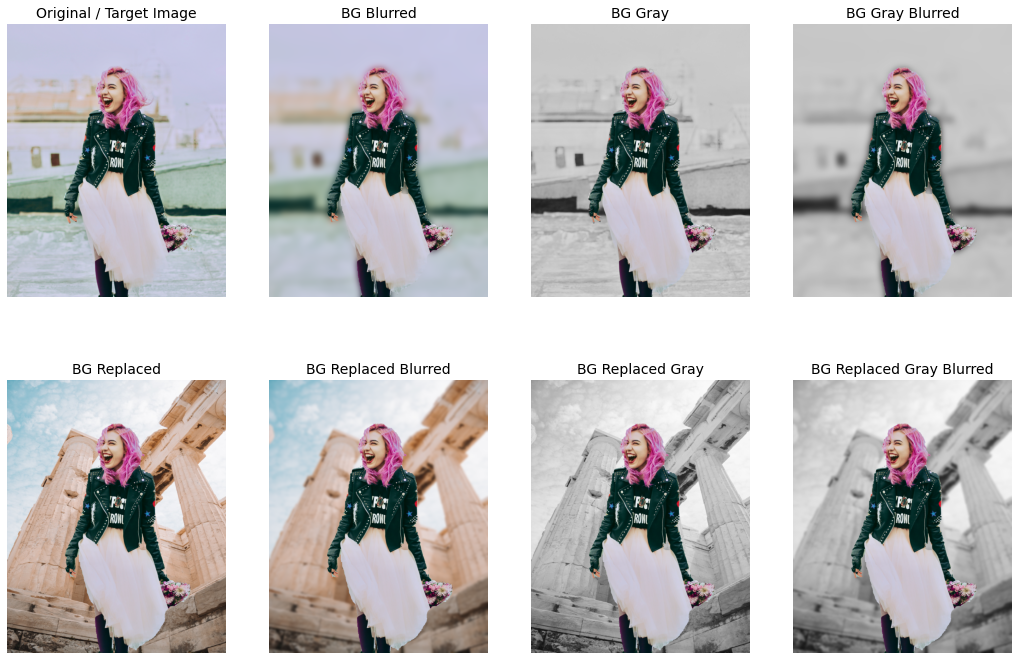

In [ ]:
plt.figure(figsize = (18,12))

plt.subplot(241); plt.axis('off'); plt.imshow(img[...,::-1]);              plt.title('Original / Target Image')
plt.subplot(242); plt.axis('off'); plt.imshow(bg_blur[...,::-1]);          plt.title('BG Blurred')
plt.subplot(243); plt.axis('off'); plt.imshow(bg_gray[...,::-1]);          plt.title('BG Gray')
plt.subplot(244); plt.axis('off'); plt.imshow(bg_gray_blur[...,::-1]);     plt.title('BG Gray Blurred')

plt.subplot(245); plt.axis('off'); plt.imshow(bg_rep[...,::-1]);           plt.title('BG Replaced')
plt.subplot(246); plt.axis('off'); plt.imshow(bg_rep_blur[...,::-1]);      plt.title('BG Replaced Blurred')
plt.subplot(247); plt.axis('off'); plt.imshow(bg_rep_gray[...,::-1]);      plt.title('BG Replaced Gray')
plt.subplot(248); plt.axis('off'); plt.imshow(bg_rep_gray_blur[...,::-1]); plt.title('BG Replaced Gray Blurred');